Image Convolution
===
B036060017 謝威廷 資管四年級, 2018/6/8

藉由 image convolution 的操作來說明 Convolutional Neural Networks 的 feature extraction 部分的運作原理。
- [Sobel_operator](https://en.wikipedia.org/wiki/Sobel_operator)

In [1]:
%matplotlib inline
import numpy as np
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt

## 讀取圖形

In [2]:
# 讀取影像
img = Image.open('lena.jpg')

In [3]:
img.size

(400, 400)

In [4]:
img.mode

'RGB'

In [5]:
# 將彩色影像轉換成灰階影像
img_gray = img.convert('L')

In [6]:
img_gray.mode

'L'

In [7]:
img_array = np.array(img_gray)

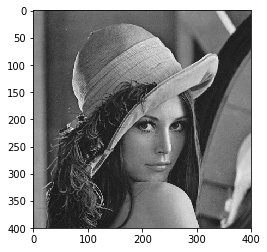

In [8]:
plt.imshow(img_array, cmap='gray');

In [9]:
img_array.shape

(400, 400)

In [10]:
img_array

array([[129, 133, 130, ...,  99,  95,  95],
       [131, 135, 131, ...,  97,  95, 100],
       [134, 136, 133, ..., 100,  96,  99],
       ..., 
       [105, 113, 120, ...,  47,  48,  49],
       [108, 112, 116, ...,  47,  48,  50],
       [103, 110, 117, ...,  47,  49,  50]], dtype=uint8)

## Solution
- 在未轉換 Data Type 前，進行 convolution，色階最高上限 $255^2$ 會超過 **int8 (-128 to 127)** 之範圍，造成 overflow 的現象
- 由於 filter 有負數，在進行 convolution 前，需使數值範圍正負數範圍加寬，因此轉換為 **int16, int32** 等皆可
- [Data Type Numeric Range Reference](https://docs.scipy.org/doc/numpy-1.10.4/user/basics.types.html)

In [11]:
# TODO: 將 img_array 做一點處理，防止 data overflow...
img_array = img_array.astype('int16')

In [12]:
img_array

array([[129, 133, 130, ...,  99,  95,  95],
       [131, 135, 131, ...,  97,  95, 100],
       [134, 136, 133, ..., 100,  96,  99],
       ..., 
       [105, 113, 120, ...,  47,  48,  49],
       [108, 112, 116, ...,  47,  48,  50],
       [103, 110, 117, ...,  47,  49,  50]], dtype=int16)

## 試試看 sobel filter 的效果

In [13]:
sobelx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype = np.float)

In [14]:
sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)

In [15]:
# Convolve
outx = ndimage.convolve(img_array, sobelx).astype('float')

In [16]:
outx

array([[ 16.,   3.,   6., ..., -10.,  -9.,   5.],
       [ 14.,   0.,   0., ...,  -6.,   1.,  13.],
       [  8.,  -4.,  -6., ...,   0.,  -4.,  10.],
       ..., 
       [ 26.,  48.,  66., ...,   6.,   8.,   4.],
       [ 23.,  45.,  69., ...,   6.,  11.,   6.],
       [ 25.,  50.,  75., ...,   7.,  12.,   5.]])

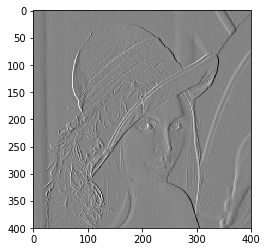

In [17]:
plt.imshow(outx, cmap='gray');

In [18]:
outy = ndimage.convolve(img_array, sobely).astype('float')

In [19]:
outy

array([[  8.,   7.,   4., ...,  -6.,   3.,  15.],
       [ 18.,  14.,   8., ...,   2.,   7.,  13.],
       [ 16.,  10.,   6., ...,  12.,   8.,  -6.],
       ..., 
       [-10., -14., -14., ...,   0.,   2.,   6.],
       [ -9., -11., -11., ...,   2.,   3.,   4.],
       [-17.,  -8.,   3., ...,   1.,   2.,   1.]])

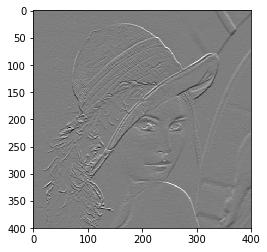

In [20]:
plt.imshow(outy, cmap='gray');

In [21]:
out = np.sqrt(outx*outx+outy*outy)

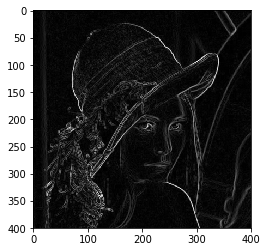

In [22]:
plt.imshow(out, cmap='gray');